1 - Reading Data and Dealing with Missing Values

In [1]:
#Import necessary libraries
import sqlite3
import pandas as pd
import numpy as np

#Establish a connection to the SQLite database
con = sqlite3.connect(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Zomato\Resources/zomato_rawdata.sqlite")

df = pd.read_sql_query("SELECT * FROM USERS", con)


In [2]:
df["rate"].replace(("NEW", "-"), np.nan, inplace= True)

df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]) if type(x) == str else x)

C:\Users\omerf\AppData\Local\Temp\ipykernel_24296\3664808616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rate"].replace(("NEW", "-"), np.nan, inplace= True)


2 - Relation Between Online Order and Rating

In [3]:
#Create a dataframe that includes rate and online order information
x = pd.crosstab(df["rate"], df["online_order"])
x.head()

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22


3 - Plot the Data

<Axes: xlabel='rate'>

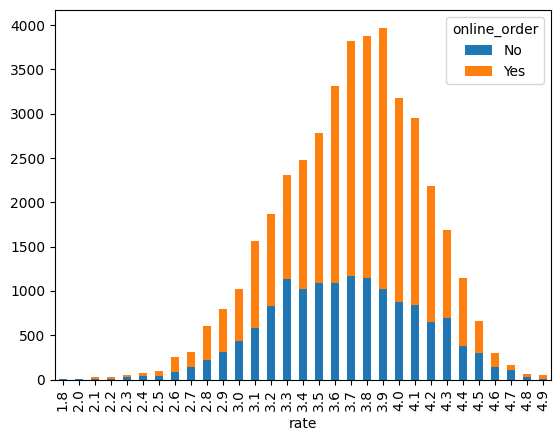

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

x.plot(kind="bar", stacked=True)

In [8]:
x.head()

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22


In [7]:
# 100% stacked bar chart
x.sum(axis=1).astype(float).head()

rate
1.8     5.0
2.0    11.0
2.1    24.0
2.2    26.0
2.3    51.0
dtype: float64

In [14]:
new_df = x.div(x.sum(axis=1).astype(float), axis=0)

new_df = new_df * 100
new_df.head()

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255


<Axes: xlabel='rate'>

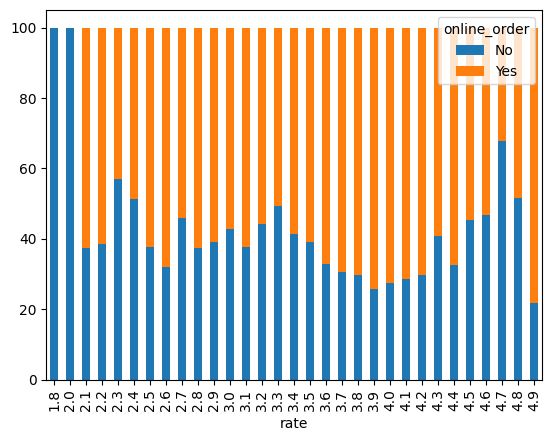

In [15]:
#Plot the data now
new_df.plot(kind="bar", stacked=True)

As you can see from the chart who accepts online order have received more number of the ratings.